In [26]:
import pandas as pd
import numpy as np
from datetime import datetime

%config InlineBackend.figure_format = 'svg'
%matplotlib inline 

In [3]:
df = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190921.txt', parse_dates=[['DATE', 'TIME']])

#no need for that anymore
#df['DATE'] = pd.to_datetime(df['DATE'])

In [ ]:
df.tail(5)

In [ ]:
df.head(5)

In [ ]:
df.describe()

In [ ]:
df.columns

In [4]:
df.rename(columns ={"EXITS                                                               ":"EXITS"}, inplace=True)

In [5]:
df.columns

Index(['DATE_TIME', 'C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [6]:
df.dtypes

DATE_TIME    datetime64[ns]
C/A                  object
UNIT                 object
SCP                  object
STATION              object
LINENAME             object
DIVISION             object
DESC                 object
ENTRIES               int64
EXITS                 int64
dtype: object

In [7]:
df['UNIT'].unique()

array(['R051', 'R079', 'R080', 'R081', 'R032', 'R022', 'R023', 'R082',
       'R083', 'R170', 'R085', 'R086', 'R462', 'R463', 'R087', 'R088',
       'R227', 'R001', 'R142', 'R311', 'R118', 'R044', 'R028', 'R125',
       'R171', 'R411', 'R412', 'R196', 'R148', 'R098', 'R262', 'R184',
       'R149', 'R263', 'R228', 'R229', 'R211', 'R150', 'R230', 'R136',
       'R172', 'R264', 'R108', 'R089', 'R099', 'R057', 'R231', 'R258',
       'R246', 'R278', 'R455', 'R197', 'R232', 'R233', 'R213', 'R214',
       'R215', 'R216', 'R390', 'R391', 'R398', 'R392', 'R393', 'R394',
       'R395', 'R396', 'R397', 'R368', 'R369', 'R234', 'R247', 'R370',
       'R371', 'R372', 'R373', 'R374', 'R399', 'R400', 'R151', 'R312',
       'R175', 'R163', 'R330', 'R248', 'R235', 'R268', 'R249', 'R250',
       'R265', 'R294', 'R279', 'R236', 'R137', 'R266', 'R295', 'R313',
       'R348', 'R349', 'R350', 'R375', 'R376', 'R152', 'R535', 'R536',
       'R460', 'R352', 'R353', 'R377', 'R378', 'R379', 'R380', 'R381',
      

In [12]:
np.count_nonzero(df.isnull())

0

In [13]:
# average of entries for each day by station and date
df.groupby(['UNIT','STATION','DATE_TIME'])[['ENTRIES']].mean().sort_values('ENTRIES', ascending=False)


ENTRIES
UNIT STATION         DATE_TIME                        
R275 183 ST          2019-09-20 20:00:00  1.151243e+09
                     2019-09-20 16:00:00  1.151243e+09
                     2019-09-20 12:00:00  1.151243e+09
                     2019-09-20 08:00:00  1.151242e+09
                     2019-09-20 04:00:00  1.151242e+09
                     2019-09-20 00:00:00  1.151242e+09
                     2019-09-19 20:00:00  1.151241e+09
                     2019-09-19 16:00:00  1.151241e+09
                     2019-09-19 12:00:00  1.151241e+09
                     2019-09-19 08:00:00  1.151241e+09
                     2019-09-19 04:00:00  1.151240e+09
                     2019-09-19 00:00:00  1.151240e+09
                     2019-09-18 20:00:00  1.151240e+09
                     2019-09-18 16:00:00  1.151240e+09
                     2019-09-18 12:00:00  1.151239e+09
                     2019-09-18 08:00:00  1.151239e+09
                     2019-09-18 04:00:00  1.151238e+09
                     2019-09-18 00:00:00  1.151238e+09
                     2019-09-17 20:00:00  1.151238e+09
                     2019-09-17 16:00:00  1.151238e+09
                     2019-09-17 12:00:00  1.151238e+09
                     2019-09-17 08:00:00  1.151237e+09
                     2019-09-17 04:00:00  1.151237e+09
                     2019-09-17 00:00:00  1.151237e+09
                     2019-09-16 20:00:00  1.151237e+09
                     2019-09-16 16:00:00  1.151236e+09
                     2019-09-16 12:00:00  1.151236e+09
                     2019-09-16 08:00:00  1.151236e+09
                     2019-09-16 04:00:00  1.151235e+09
                     2019-09-16 00:00:00  1.151235e+09
...                                                ...
R541 THIRTY ST       2019-09-17 05:13:16  0.000000e+00
     THIRTY THIRD ST 2019-09-14 13:03:21  0.000000e+00
                     2019-09-19 16:43:45  0.000000e+00
                     2019-09-16 15:27:21  0.000000e+00
     THIRTY ST       2019-09-15 02:49:16  0.000000e+00
     THIRTY THIRD ST 2019-09-18 05:15:45  0.000000e+00
                     2019-09-15 14:15:21  0.000000e+00
     THIRTY ST       2019-09-15 07:01:16  0.000000e+00
     THIRTY THIRD ST 2019-09-20 09:31:45  0.000000e+00
                     2019-09-19 04:07:46  0.000000e+00
     THIRTY ST       2019-09-18 19:01:38  0.000000e+00
     THIRTY THIRD ST 2019-09-18 09:27:45  0.000000e+00
     THIRTY ST       2019-09-15 11:13:16  0.000000e+00
     THIRTY THIRD ST 2019-09-17 08:15:21  0.000000e+00
                     2019-09-19 20:55:45  0.000000e+00
                     2019-09-14 00:27:21  0.000000e+00
     THIRTY ST       2019-09-15 15:25:16  0.000000e+00
                     2019-09-18 14:49:38  0.000000e+00
                     2019-09-17 09:25:16  0.000000e+00
     THIRTY THIRD ST 2019-09-16 11:15:21  0.000000e+00
     THIRTY ST       2019-09-18 10:37:38  0.000000e+00
                     2019-09-15 19:37:16  0.000000e+00
                     2019-09-15 23:49:16  0.000000e+00
     THIRTY THIRD ST 2019-09-15 05:51:21  0.000000e+00
                     2019-09-17 12:27:45  0.000000e+00
                     2019-09-14 04:39:21  0.000000e+00
     THIRTY ST       2019-09-18 06:25:38  0.000000e+00
     THIRTY THIRD ST 2019-09-20 13:43:45  0.000000e+00
     THIRTY ST       2019-09-16 04:01:16  0.000000e+00
     THIRTY THIRD ST 2019-09-15 10:03:21  0.000000e+00

[32719 rows x 1 columns]

In [14]:
##NO GOOD df.groupby(['UNIT','STATION']).sort_values('UNIT', ascending=False)

In [15]:
df.groupby('UNIT')['STATION'].apply(lambda x: list(np.unique(x)))

UNIT
R001                       [SOUTH FERRY, WHITEHALL S-FRY]
R003                                      [CYPRESS HILLS]
R004                                      [75 ST-ELDERTS]
R005                                    [85 ST-FOREST PK]
R006                                     [WOODHAVEN BLVD]
R007                                             [104 ST]
R008                                             [111 ST]
R009                                             [121 ST]
R010                                    [42 ST-PORT AUTH]
R011                                    [42 ST-PORT AUTH]
R012                                     [34 ST-PENN STA]
R013                                     [34 ST-PENN STA]
R014                                          [FULTON ST]
R015                                         [5 AV/53 ST]
R016                                    [LEXINGTON AV/53]
R017                                    [LEXINGTON AV/53]
R018                    [74 ST-BROADWAY, JKSN HT-ROOSVLT]
R019     

In [8]:
print(df['UNIT'].nunique())
print(df['STATION'].nunique())

468
378


We have 468 different units recording at 378 different stations. Some stations have multiple units. Add potential sum after counting the traffic

In [15]:
df[['UNIT', 'DATE_TIME', 'ENTRIES', 'EXITS', 'ENTRIES_diff', 'EXITS_diff']].head(10)

,UNIT,DATE_TIME,ENTRIES,EXITS,ENTRIES_diff,EXITS_diff
0,R051,2019-09-14 00:00:00,7198818,2438323,NaN,NaN
1,R051,2019-09-14 04:00:00,7198834,2438325,16.0,2.0
2,R051,2019-09-14 08:00:00,7198847,2438354,13.0,29.0
3,R051,2019-09-14 12:00:00,7198929,2438428,82.0,74.0
4,R051,2019-09-14 16:00:00,7199125,2438483,196.0,55.0
5,R051,2019-09-14 20:00:00,7199405,2438527,280.0,44.0
6,R051,2019-09-15 00:00:00,7199547,2438545,142.0,18.0
7,R051,2019-09-15 04:00:00,7199567,2438547,20.0,2.0
8,R051,2019-09-15 08:00:00,7199579,2438564,12.0,17.0
9,R051,2019-09-15 12:00:00,7199648,2438630,69.0,66.0


In [16]:
gb_unit = df.groupby('UNIT')

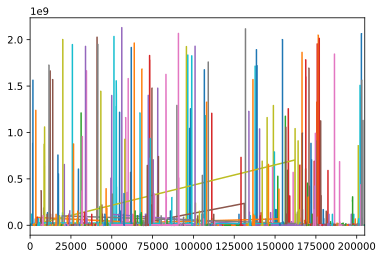

In [28]:
gb_unit['ENTRIES'].plot(kind='line');

In [12]:
df['ENTRIES_diff'] = df.ENTRIES.diff()
df['EXITS_diff'] = df.EXITS.diff()

In [13]:
df.head()

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DESC,ENTRIES,EXITS,ENTRIES_diff,EXITS_diff
0,2019-09-14 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7198818,2438323,NaN,NaN
1,2019-09-14 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7198834,2438325,16.0,2.0
2,2019-09-14 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7198847,2438354,13.0,29.0
3,2019-09-14 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7198929,2438428,82.0,74.0
4,2019-09-14 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7199125,2438483,196.0,55.0


In [20]:
math = df[['UNIT','DATE_TIME','ENTRIES_diff','EXITS_diff']

In [22]:
math2 = df['UNIT'] == 'R051'

In [25]:
math2

0          True
1          True
2          True
3          True
4          True
5          True
6          True
7          True
8          True
9          True
10         True
11         True
12         True
13         True
14         True
15         True
16         True
17         True
18         True
19         True
20         True
21         True
22         True
23         True
24         True
25         True
26         True
27         True
28         True
29         True
          ...  
204898    False
204899    False
204900    False
204901    False
204902    False
204903    False
204904    False
204905    False
204906    False
204907    False
204908    False
204909    False
204910    False
204911    False
204912    False
204913    False
204914    False
204915    False
204916    False
204917    False
204918    False
204919    False
204920    False
204921    False
204922    False
204923    False
204924    False
204925    False
204926    False
204927    False
Name: UNIT, Length: 2049